In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [75]:
train = pd.read_csv('train_final.csv')
test = pd.read_csv('test_final.csv')
valid = pd.read_csv('valid_final.csv')

# Logistička regresija

1. Odluka je kako tretiramo klastere

- Bez klastera 
- Klaster kao atribut
- Model za svaki klaster

2. Koji atributi
- sa svim atributima
- polinomijani atributi
- feature selection
------------------------
 Na trainu koristimo kros validaciju.
 


ovde smo probali da ne koristimo klaster kao atribut

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import StratifiedKFold


model = LogisticRegression(solver='liblinear') 


scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': make_scorer(roc_auc_score)
}


cv = StratifiedKFold(n_splits=5)  


results = cross_validate(model, train.drop(columns=['Cluster','IsBadBuy']), train['IsBadBuy'], cv=cv, scoring=scoring)


print(f"Precision: {results['test_precision'].mean():.4f}")
print(f"Recall: {results['test_recall'].mean():.4f}")
print(f"Accuracy: {results['test_accuracy'].mean():.4f}")
print(f"AUC: {results['test_roc_auc'].mean():.4f}")


Precision: 0.6511
Recall: 0.0030
Accuracy: 0.8769
AUC: 0.5014


In [78]:
#koristimo klaster kao atribut

model = LogisticRegression(solver='liblinear') 


scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': make_scorer(roc_auc_score)
}


cv = StratifiedKFold(n_splits=5)  


results = cross_validate(model, train.drop(columns='IsBadBuy'), train['IsBadBuy'], cv=cv, scoring=scoring)

# Prikaz metrika
print(f"Precision: {results['test_precision'].mean():.4f}")
print(f"Recall: {results['test_recall'].mean():.4f}")
print(f"Accuracy: {results['test_accuracy'].mean():.4f}")
print(f"AUC: {results['test_roc_auc'].mean():.4f}")


Precision: 0.7000
Recall: 0.0024
Accuracy: 0.8769
AUC: 0.5011


In [79]:
from sklearn.ensemble import RandomForestClassifier

X_train = train.drop(columns='IsBadBuy')
y_train = train['IsBadBuy']

# Kreirajte i trenirajte model Random Forest-a
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dobijanje važnosti atributa
importances = model.feature_importances_

# Kreiranje DataFrame-a za lakšu analizu
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sortiranje po važnosti
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Prikaz rezultata
print(feature_importance_df)


                 Feature  Importance
4            CostPerMile    0.130045
6            CostPerYear    0.129028
24            MMRAverage    0.128883
5        WarrantyPerMile    0.126807
7        VehOdo_Standard    0.126560
2               VehBCost    0.119602
3           WarrantyCost    0.064831
0             VehicleAge    0.028815
1                   Size    0.027412
20  TrimCategory_Encoded    0.017832
8          Adesa_Auction    0.014568
25               Cluster    0.010110
21                 Alloy    0.008318
12             make_FORD    0.007951
9         make_CHEVROLET    0.007566
22                Covers    0.007319
11            make_DODGE    0.007155
19            make_other    0.007070
10         make_CHRYSLER    0.006345
23            isAmerican    0.005626
17          make_PONTIAC    0.004327
18           make_SATURN    0.003476
15              make_KIA    0.003021
16           make_NISSAN    0.002689
13          make_HYUNDAI    0.002602
14             make_JEEP    0.002042


In [9]:

from sklearn.inspection import permutation_importance


# Trenirajte model (ovde koristimo Random Forest, ali može biti bilo koji drugi model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Koristite Permutation Importance
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

# Kreirajte DataFrame za lakšu analizu
permutation_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean,
    'Std Dev': result.importances_std
})

# Sortirajte po važnosti
permutation_importance_df = permutation_importance_df.sort_values(by='Importance', ascending=False)

# Prikaz rezultata
print(permutation_importance_df)

                 Feature  Importance   Std Dev
2               VehBCost    0.142107  0.000921
21            MMRAverage    0.123857  0.001140
4        VehOdo_Standard    0.112566  0.001178
0             VehicleAge    0.105545  0.000781
3           WarrantyCost    0.103955  0.000381
22               Cluster    0.083931  0.000752
1                   Size    0.072975  0.000527
19                Covers    0.062753  0.000611
17  TrimCategory_Encoded    0.056231  0.000690
18                 Alloy    0.051534  0.000548
5          Adesa_Auction    0.039876  0.000638
6         make_CHEVROLET    0.028333  0.000385
9              make_FORD    0.023634  0.000367
8             make_DODGE    0.018290  0.000346
7          make_CHRYSLER    0.017050  0.000348
20            isAmerican    0.014734  0.000247
16            make_other    0.012319  0.000195
14          make_PONTIAC    0.006227  0.000182
13           make_NISSAN    0.005929  0.000074
11             make_JEEP    0.004747  0.000081
15           

In [80]:

important_features = feature_importance_df[feature_importance_df['Importance'].abs() > 0.01]

# Prikaz rezultata
print(important_features)


                 Feature  Importance
4            CostPerMile    0.130045
6            CostPerYear    0.129028
24            MMRAverage    0.128883
5        WarrantyPerMile    0.126807
7        VehOdo_Standard    0.126560
2               VehBCost    0.119602
3           WarrantyCost    0.064831
0             VehicleAge    0.028815
1                   Size    0.027412
20  TrimCategory_Encoded    0.017832
8          Adesa_Auction    0.014568
25               Cluster    0.010110


In [81]:
X_train_important = X_train[important_features['Feature']]

# Prikaz novog DataFrame-a
print(X_train_important.head())

   CostPerMile  CostPerYear  MMRAverage  WarrantyPerMile  VehOdo_Standard  \
0     0.029310     0.437552    1.108157         1.153278         0.331758   
1    -0.835121    -0.421819   -0.529157         0.066493         0.420841   
2     0.294655     0.589024    1.146322        -0.654293         0.074933   
3    -0.961328    -0.588748   -0.446700        -0.855236         1.475867   
4    -0.300364     0.174795   -0.157577         0.218226         0.539168   

   VehBCost  WarrantyCost  VehicleAge  Size  TrimCategory_Encoded  \
0  0.421311      1.160929           3     2                     1   
1 -1.154650      0.185613           3     1                     0   
2  0.699088     -0.596307           3     5                     1   
3 -0.871204     -0.374569           4     1                     0   
4 -0.060548      0.380676           3     2                     0   

   Adesa_Auction  Cluster  
0              0        0  
1              0        1  
2              0        0  
3         

In [82]:


model = LogisticRegression(solver='liblinear') 


scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': make_scorer(roc_auc_score)
}


cv = StratifiedKFold(n_splits=5)  


results = cross_validate(model,X_train_important, train['IsBadBuy'], cv=cv, scoring=scoring)

# Prikaz metrika
print(f"Precision: {results['test_precision'].mean():.4f}")
print(f"Recall: {results['test_recall'].mean():.4f}")
print(f"Accuracy: {results['test_accuracy'].mean():.4f}")
print(f"AUC: {results['test_roc_auc'].mean():.4f}")


Precision: 0.8000
Recall: 0.0016
Accuracy: 0.8769
AUC: 0.5007


In [83]:
from sklearn.preprocessing import PolynomialFeatures
train_x = train.drop(columns='IsBadBuy')
train_y = train['IsBadBuy']
model_poly = PolynomialFeatures(degree=2)
x_poly = model_poly.fit_transform(train_x)
feature_names = model_poly.get_feature_names_out()

In [84]:
feature_names

array(['1', 'VehicleAge', 'Size', 'VehBCost', 'WarrantyCost',
       'CostPerMile', 'WarrantyPerMile', 'CostPerYear', 'VehOdo_Standard',
       'Adesa_Auction', 'make_CHEVROLET', 'make_CHRYSLER', 'make_DODGE',
       'make_FORD', 'make_HYUNDAI', 'make_JEEP', 'make_KIA',
       'make_NISSAN', 'make_PONTIAC', 'make_SATURN', 'make_other',
       'TrimCategory_Encoded', 'Alloy', 'Covers', 'isAmerican',
       'MMRAverage', 'Cluster', 'VehicleAge^2', 'VehicleAge Size',
       'VehicleAge VehBCost', 'VehicleAge WarrantyCost',
       'VehicleAge CostPerMile', 'VehicleAge WarrantyPerMile',
       'VehicleAge CostPerYear', 'VehicleAge VehOdo_Standard',
       'VehicleAge Adesa_Auction', 'VehicleAge make_CHEVROLET',
       'VehicleAge make_CHRYSLER', 'VehicleAge make_DODGE',
       'VehicleAge make_FORD', 'VehicleAge make_HYUNDAI',
       'VehicleAge make_JEEP', 'VehicleAge make_KIA',
       'VehicleAge make_NISSAN', 'VehicleAge make_PONTIAC',
       'VehicleAge make_SATURN', 'VehicleAge make_ot

In [85]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

model = Lasso(alpha=0.01)
selector = SelectFromModel(model)
X_selected_lasso = selector.fit_transform(x_poly, train['IsBadBuy'])
selected_features_lasso = selector.get_feature_names_out(feature_names)
print("Selected features using Lasso:", selected_features_lasso)

Selected features using Lasso: ['VehicleAge^2' 'VehicleAge VehBCost' 'VehicleAge WarrantyCost'
 'VehicleAge VehOdo_Standard' 'VehicleAge Adesa_Auction'
 'VehicleAge make_CHEVROLET' 'VehicleAge TrimCategory_Encoded'
 'VehicleAge Alloy' 'Size^2' 'Size make_CHEVROLET' 'Size MMRAverage'
 'VehBCost^2' 'CostPerMile^2' 'CostPerMile MMRAverage' 'WarrantyPerMile^2']


Koristili smo poly da napravimo nelinearne kombinacije atributa, zatim smo laso regularizacijom odabrali najznacajnije atribute i onda smo napravili model logisticke regresije, koji je pokazao bolje rezultate nego sa nasim obicnim atributima.

In [86]:
from sklearn.model_selection import train_test_split

X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected_lasso, train['IsBadBuy'], test_size=0.2, random_state=42
)

# Kreiranje i treniranje modela logističke regresije
model_poly_log_reg = LogisticRegression(solver='liblinear', random_state=42)
model_poly_log_reg.fit(X_train_selected, y_train)

# Predikcija na test setu
y_pred = model_poly_log_reg.predict(X_test_selected)
y_pred_proba = model_poly_log_reg.predict_proba(X_test_selected)[:, 1]

# Evaluacija performansi modela
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")

Accuracy: 0.8840
Precision: 0.4074
Recall: 0.0187
AUC: 0.6722


In [87]:
# Priprema validacionog skupa na isti način kao što je urađeno za trening set
valid_x = valid.drop(columns='IsBadBuy')
valid_y = valid['IsBadBuy']
x_valid_poly = model_poly.transform(valid_x)  # Koristimo transformaciju sa istim modelom

# Selektovanje atributa na osnovu Lasso modela
X_valid_selected = selector.transform(x_valid_poly)  # Koristimo selektor koji je već treniran


In [90]:
best_score = -float('inf')
best_params = {}
best_model = None

# Iteriramo kroz sve kombinacije hiperparametara
for penalty in ['l1']:
    for C in [0.01, 0.005]:
        for solver in ['liblinear']:
            if penalty == 'l1' and solver == 'saga':
                continue  # saga ne podržava L1 bez ElasticNet

            # Kreiramo i treniramo model sa trenutnim hiperparametrima
            model_poly_log_reg = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=42,max_iter=1500)
            model_poly_log_reg.fit(X_train_selected, y_train)

            # Evaluacija na validacionom setu
            y_valid_pred_proba = model_poly_log_reg.predict_proba(X_valid_selected)[:, 1]
            score = roc_auc_score(valid_y, y_valid_pred_proba)

            # Provera da li je trenutni model najbolji
            if score > best_score:
                best_score = score
                best_params = {'penalty': penalty, 'C': C, 'solver': solver}
                best_model = model_poly_log_reg

# Prikaz najboljih hiperparametara i rezultata
print(f"Best Hyperparameters: {best_params}")
print(f"Best AUC on validation set: {best_score:.4f}")


Best Hyperparameters: {'penalty': 'l1', 'C': 0.005, 'solver': 'liblinear'}
Best AUC on validation set: 0.6739


Best Hyperparameters: {'penalty': 'l1', 'C': 0.01, 'solver': 'liblinear'}
Best AUC on validation set: 0.6737
prva iteracija
Best Hyperparameters: {'penalty': 'l1', 'C': 0.005, 'solver': 'liblinear'}
Best AUC on validation set: 0.6739

In [91]:
test = pd.read_csv('test_final.csv')

In [92]:
# Pretpostavimo da je 'IsBadBuy' ciljna promenljiva u test setu
test_x = test.drop(columns='IsBadBuy')
test_y = test['IsBadBuy']

# Transformacija test skupa koristeći PolynomialFeatures i Lasso selektor
x_test_poly = model_poly.transform(test_x)
X_test_selected = selector.transform(x_test_poly)




In [93]:
final_model = LogisticRegression(
    penalty='l1', 
    C=0.05, 
    solver='liblinear', 
    random_state=42,
    max_iter=1000  # Dodatno povećan broj iteracija za osiguranje konvergencije
)

# Treniranje modela na trening skupu
final_model.fit(X_train_selected, y_train)

LogisticRegression(C=0.05, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [175]:
from sklearn.metrics import classification_report, roc_auc_score

# Predikcije na test setu
y_test_pred = final_model.predict(X_valid_selected)
y_test_pred_proba = final_model.predict_proba(X_valid_selected)[:, 1]

# Evaluacija performansi modela na test setu
accuracy = accuracy_score(valid_y, y_test_pred)
precision = precision_score(valid_y, y_test_pred)
recall = recall_score(valid_y, y_test_pred)
roc_auc = roc_auc_score(valid_y, y_test_pred_proba)

# Prikaz rezultata
print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Precision on test set: {precision:.4f}")
print(f"Recall on test set: {recall:.4f}")
print(f"AUC on test set: {roc_auc:.4f}")

# Prikaz classification report-a
print("\nClassification Report:")
print(classification_report(valid_y, y_test_pred))

# Prikaz AUC-a
print(f"\nAUC on test set: {roc_auc:.4f}")


Accuracy on test set: 0.8780
Precision on test set: 0.5116
Recall on test set: 0.0165
AUC on test set: 0.6731

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9611
           1       0.51      0.02      0.03      1336

    accuracy                           0.88     10947
   macro avg       0.70      0.51      0.48     10947
weighted avg       0.83      0.88      0.82     10947


AUC on test set: 0.6731


In [96]:
train_x = train.drop(columns='IsBadBuy')
train_y = train['IsBadBuy']
valid_x = valid.drop(columns='IsBadBuy')
valid_y = valid['IsBadBuy']
test_x = test.drop(columns='IsBadBuy')
test_y = test['IsBadBuy']

# Transformacija podataka koristeći PolynomialFeatures
x_poly_train = model_poly.fit_transform(train_x)
x_poly_valid = model_poly.transform(valid_x)
x_poly_test = model_poly.transform(test_x)

# Selektovanje atributa na osnovu Lasso modela
X_train_selected = selector.fit_transform(x_poly_train, train_y)
X_valid_selected = selector.transform(x_poly_valid)
X_test_selected = selector.transform(x_poly_test)



# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Kreiranje Random Forest modela
rf_model = RandomForestClassifier(min_samples_split= 100,min_samples_leaf= 100, max_depth= 8,criterion= 'entropy',
                                 class_weight= {0: 1, 1: 7.0}, random_state=42)





# Definisanje scoring metrika
scoring = ['roc_auc', 'precision', 'recall', 'f1']

# Cross-validacija sa više metrika
cv_results = cross_validate(rf_model, X_train_selected, train_y, cv=5, scoring=scoring, n_jobs=-1)

# Prikaz prosečnih rezultata za svaku metriku
print(f"Mean ROC AUC: {cv_results['test_roc_auc'].mean():.4f}")
print(f"Mean Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Mean Recall: {cv_results['test_recall'].mean():.4f}")
print(f"Mean F1-Score: {cv_results['test_f1'].mean():.4f}")


Mean ROC AUC: 0.6850
Mean Precision: 0.2010
Mean Recall: 0.5994
Mean F1-Score: 0.3010


Mean ROC AUC: 0.6894
Mean Precision: 0.2008
Mean Recall: 0.6183
Mean F1-Score: 0.3031 NA TRAIN_X

Mean ROC AUC: 0.6850
Mean Precision: 0.2010
Mean Recall: 0.5994
Mean F1-Score: 0.3010 NA TRAIN_X_Selected

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisanje mreže hiperparametara za pretragu
param_grid = {
    'min_samples_split': [135, 175, 150],
    'min_samples_leaf': [50, 30, 60],
    'max_depth': [18, 15, 12],
    'criterion': ['entropy'],
    'class_weight': [{0: 1, 1: 8.5}, {0: 1, 1: 8.0},{0: 1, 1: 7.5}]
    
}

# Kreiranje Random Forest modela
rf_model = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

# Grid Search sa 5-fold cross-validacijom
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Treniranje modela sa Grid Search-om na trening skupu
grid_search_rf.fit(train_x, train_y)

# Prikaz najboljih hiperparametara
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for Random Forest: {'class_weight': {0: 1, 1: 7.5}, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 175}


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters for Random Forest: {'class_weight': {0: 1, 1: 8.0}, 'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 150}

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for Random Forest: {'class_weight': {0: 1, 1: 7.5}, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 175} Druga iteracija

param_grid = {
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [50, 100, 150],
    'max_depth': [6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'class_weight': [{0: 1, 1: 7.0}, {0: 1, 1: 8.0}]
}
Ovo su bili parametri u prvoj iteraciji grid searcha 


In [117]:


# Kreiranje finalnog modela sa najboljim hiperparametrima
rf_model = RandomForestClassifier(min_samples_split= 150,min_samples_leaf= 50, max_depth= 12,criterion= 'entropy',
                                 class_weight= {0: 1, 1: 8.0}, random_state=42)
# Treniranje modela na celokupnom trening skupu
rf_model.fit(X_train, train_y)


RandomForestClassifier(class_weight={0: 1, 1: 8.0}, criterion='entropy',
                       max_depth=12, min_samples_leaf=50, min_samples_split=150,
                       random_state=42)

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Predikcija na validacionom skupu
y_valid_pred_rf = rf_model.predict(valid_x)
y_valid_pred_proba_rf = rf_model.predict_proba(valid_x)[:, 1]

# Evaluacija performansi modela na validacionom skupu
accuracy_valid = accuracy_score(valid_y, y_valid_pred_rf)
precision_valid = precision_score(valid_y, y_valid_pred_rf)
recall_valid = recall_score(valid_y, y_valid_pred_rf)
roc_auc_valid = roc_auc_score(valid_y, y_valid_pred_proba_rf)
f1_valid = f1_score(valid_y, y_valid_pred_rf)

# Prikaz rezultata
print(f"Random Forest Accuracy on validation set: {accuracy_valid:.4f}")
print(f"Random Forest Precision on validation set: {precision_valid:.4f}")
print(f"Random Forest Recall on validation set: {recall_valid:.4f}")
print(f"Random Forest AUC on validation set: {roc_auc_valid:.4f}")
print(f"Random Forest F1-Score on validation set: {f1_valid:.4f}")


Random Forest Accuracy on validation set: 0.6154
Random Forest Precision on validation set: 0.1895
Random Forest Recall on validation set: 0.6564
Random Forest AUC on validation set: 0.6844
Random Forest F1-Score on validation set: 0.2941


In [123]:
# Druga iteracija podesavanja hiperparametara

rf2_model = RandomForestClassifier(min_samples_split= 175,min_samples_leaf= 30, max_depth= 15,criterion= 'entropy',
                                 class_weight= {0: 1, 1: 7.5}, random_state=42)
# Treniranje modela na celokupnom trening skupu
rf2_model.fit(X_train, train_y)


RandomForestClassifier(class_weight={0: 1, 1: 7.5}, criterion='entropy',
                       max_depth=15, min_samples_leaf=30, min_samples_split=175,
                       random_state=42)

{'class_weight': {0: 1, 1: 7.5}, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 30, 'min_samples_split': 175}

In [139]:
# Predikcija na validacionom skupu ; druga iteracija
y_valid_pred_rf2 = rf2_model.predict(valid_x)
y_valid_pred_proba_rf2 = rf2_model.predict_proba(valid_x)[:, 1]

# Evaluacija performansi modela na validacionom skupu
accuracy_valid = accuracy_score(valid_y, y_valid_pred_rf2)
precision_valid = precision_score(valid_y, y_valid_pred_rf2)
recall_valid = recall_score(valid_y, y_valid_pred_rf2)
roc_auc_valid = roc_auc_score(valid_y, y_valid_pred_proba_rf2)
f1_valid = f1_score(valid_y, y_valid_pred_rf2)

# Prikaz rezultata
print(f"Random Forest Accuracy on validation set: {accuracy_valid:.4f}")
print(f"Random Forest Precision on validation set: {precision_valid:.4f}")
print(f"Random Forest Recall on validation set: {recall_valid:.4f}")
print(f"Random Forest AUC on validation set: {roc_auc_valid:.4f}")
print(f"Random Forest F1-Score on validation set: {f1_valid:.4f}")

Random Forest Accuracy on validation set: 0.6518
Random Forest Precision on validation set: 0.1961
Random Forest Recall on validation set: 0.5981
Random Forest AUC on validation set: 0.6844
Random Forest F1-Score on validation set: 0.2954


Prva iteracija hiperparametara
Random Forest Accuracy on validation set: 0.6154
Random Forest Precision on validation set: 0.1895
Random Forest Recall on validation set: 0.6564
Random Forest AUC on validation set: 0.6844
Random Forest F1-Score on validation set: 0.2941

In [125]:
# Treca iteracija podesavanja hiperparametara

rf3_model = RandomForestClassifier(min_samples_split= 175,min_samples_leaf= 30, max_depth= 15,criterion= 'entropy',
                                 class_weight= {0: 1, 1: 8.13}, random_state=42)
# Treniranje modela na celokupnom trening skupu
rf3_model.fit(X_train, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 8.13}, criterion='entropy',
                       max_depth=15, min_samples_leaf=30, min_samples_split=175,
                       random_state=42)

In [126]:
# Predikcija na validacionom skupu ; druga iteracija
y_valid_pred_rf = rf3_model.predict(valid_x)
y_valid_pred_proba_rf = rf3_model.predict_proba(valid_x)[:, 1]

# Evaluacija performansi modela na validacionom skupu
accuracy_valid = accuracy_score(valid_y, y_valid_pred_rf)
precision_valid = precision_score(valid_y, y_valid_pred_rf)
recall_valid = recall_score(valid_y, y_valid_pred_rf)
roc_auc_valid = roc_auc_score(valid_y, y_valid_pred_proba_rf)
f1_valid = f1_score(valid_y, y_valid_pred_rf)

# Prikaz rezultata
print(f"Random Forest Accuracy on validation set: {accuracy_valid:.4f}")
print(f"Random Forest Precision on validation set: {precision_valid:.4f}")
print(f"Random Forest Recall on validation set: {recall_valid:.4f}")
print(f"Random Forest AUC on validation set: {roc_auc_valid:.4f}")
print(f"Random Forest F1-Score on validation set: {f1_valid:.4f}")

Random Forest Accuracy on validation set: 0.6210
Random Forest Precision on validation set: 0.1894
Random Forest Recall on validation set: 0.6422
Random Forest AUC on validation set: 0.6832
Random Forest F1-Score on validation set: 0.2926


### Najbolji random forest je model rf2_model

In [140]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(valid_y, y_valid_pred_rf2))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      9611
           1       0.20      0.60      0.30      1336

    accuracy                           0.65     10947
   macro avg       0.56      0.63      0.53     10947
weighted avg       0.83      0.65      0.71     10947



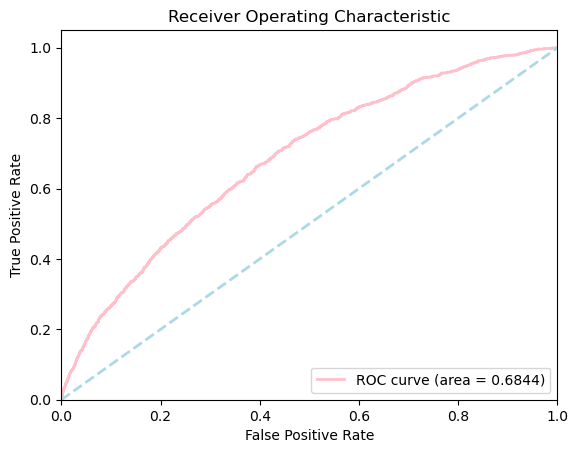

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Izračunavanje ROC krive
fpr, tpr, thresholds = roc_curve(valid_y, y_valid_pred_proba_rf2)
roc_auc = auc(fpr, tpr)

# Nacrtaj ROC krivu
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [142]:
# Izračunavanje Youdenovog indeksa
youden_index = tpr - fpr
best_threshold_index = youden_index.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Najbolji prag odluke po Judenovoj metodi: {best_threshold:.4f}")


Najbolji prag odluke po Judenovoj metodi: 0.4753


In [143]:
from sklearn.metrics import confusion_matrix

# Predikcija sa optimalnim threshold-om
y_valid_pred_optimal = (y_valid_pred_proba_rf2 >= 0.4753).astype(int)

# Matrica konfuzije za optimalni threshold
conf_matrix_optimal = confusion_matrix(valid_y, y_valid_pred_optimal)
print("Matrica konfuzije sa pragom odluke od 0.4753:")
print(conf_matrix_optimal)


Matrica konfuzije sa pragom odluke od 0.4753:
[[5834 3777]
 [ 452  884]]


In [144]:

conf_matrix_default = confusion_matrix(valid_y, y_valid_pred_rf2)
print("Matrica konfuzije sa pragom od 0.5:")
print(conf_matrix_default)


Matrica konfuzije sa pragom od 0.5:
[[6336 3275]
 [ 537  799]]


In [145]:
def calculate_economic_income(y_true, y_pred_proba, threshold):
    # Primenjujemo threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Definišemo TP, TN, FP, FN
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Izračunavanje ekonomskog prihoda prema matrici sa slike
    economic_income = (TP * 0) + (TN * 3100) + (FP * -3100) + (FN * -6300)
    
    return economic_income

In [146]:
def find_optimal_threshold(y_true, y_pred_proba):
    # Izračunavanje ROC krive
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Računamo ekonomski prihod za svaki threshold
    economic_incomes = [calculate_economic_income(y_true, y_pred_proba, t) for t in thresholds]
    
    # Nalazimo threshold koji maksimizuje ekonomski prihod
    best_index = np.argmax(economic_incomes)
    best_threshold = thresholds[best_index]
    best_income = economic_incomes[best_index]
    
    return best_threshold, best_income, economic_incomes, thresholds

In [147]:
best_threshold, best_income, economic_incomes, thresholds = find_optimal_threshold(valid_y, y_valid_pred_proba_rf2)

print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Max Economic Income: {best_income:.2f}")

Optimal Threshold: 0.8455
Max Economic Income: 21390300.00


In [148]:
# Predikcija sa optimalnim threshold-om
y_valid_pred_optimal_money = (y_valid_pred_proba_rf2 >= 0.8455).astype(int)

# Matrica konfuzije za optimalni threshold
conf_matrix_optimal_money = confusion_matrix(valid_y, y_valid_pred_optimal_money)
print("Matrica konfuzije sa pragom odluke od 0.8455:")
print(conf_matrix_optimal)


Matrica konfuzije sa pragom odluke od 0.8455:
[[5834 3777]
 [ 452  884]]


In [151]:
calculate_economic_income(valid_y, y_valid_pred_proba_rf2, 0.84546)

21384000

In [152]:
calculate_economic_income(valid_y, y_valid_pred_proba_rf2, 1)

21377300

## XGBOOST

In [155]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Kreiranje XGBoost modela
xgb_model = XGBClassifier(
    scale_pos_weight=7,  # Parametar za balansiranje klasa, možeš ga prilagoditi
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Definisanje StratifiedKFold cross-validation-a sa 5 podela
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Izvršavanje cross-validation-a
cv_scores = cross_val_score(xgb_model, X_train_selected, train_y, cv=skf, scoring='roc_auc')

# Prikaz rezultata cross-validation-a
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of AUC scores: {cv_scores.std():.4f}")


C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Milutin\anaconda3\Lib\site-p

Cross-validation AUC scores: [0.63960797 0.64625634 0.64388347 0.64155526 0.64833925]
Mean AUC score: 0.6439
Standard Deviation of AUC scores: 0.0031


In [158]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definišemo XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definišemo mrežu hiperparametara za pretragu
param_grid = {
   
    'max_depth': [ 7,10,15],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'gamma': [ 0.1, 0.05],
    'scale_pos_weight': [7],  # Podešavanje za nebalansirane klase
    'min_child_weight': [3, 5]
}

# Postavljamo GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=4, n_jobs=-1, verbose=2)

# Treniranje modela sa Grid Search-om na trening skupu
grid_search.fit(X_train_selected, train_y)

# Prikaz najboljih parametara i rezultata
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Hyperparameters for XGBoost: {best_params}")
print(f"Best AUC score: {best_score:.4f}")


Fitting 4 folds for each of 24 candidates, totalling 96 fits


C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:26:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'scale_pos_weight': 7, 'subsample': 0.7}
Best AUC score: 0.6870


 PRva iteracija : Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'scale_pos_weight': 7, 'subsample': 0.7}
Best AUC score: 0.6870


Druga iteracija Best Hyperparameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'scale_pos_weight': 7, 'subsample': 0.7}
Best AUC score: 0.6870

In [160]:
from xgboost import XGBClassifier


# Kreiranje finalnog XGBoost modela sa najboljim hiperparametrima
final_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.1,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=5,
    scale_pos_weight=7,
    subsample=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Treniranje modela na celokupnom trening skupu
final_xgb_model.fit(X_train_selected, train_y)

# Predikcija na validacionom skupu
y_valid_pred_xgb = final_xgb_model.predict(X_valid_selected)
y_valid_pred_proba_xgb = final_xgb_model.predict_proba(X_valid_selected)[:, 1]

# Evaluacija performansi modela na validacionom skupu
accuracy_valid = accuracy_score(valid_y, y_valid_pred_xgb)
precision_valid = precision_score(valid_y, y_valid_pred_xgb)
recall_valid = recall_score(valid_y, y_valid_pred_xgb)
roc_auc_valid = roc_auc_score(valid_y, y_valid_pred_proba_xgb)
f1_valid = f1_score(valid_y, y_valid_pred_xgb)

# Prikaz rezultata
print(f"XGBoost Accuracy on validation set: {accuracy_valid:.4f}")
print(f"XGBoost Precision on validation set: {precision_valid:.4f}")
print(f"XGBoost Recall on validation set: {recall_valid:.4f}")
print(f"XGBoost AUC on validation set: {roc_auc_valid:.4f}")
print(f"XGBoost F1-Score on validation set: {f1_valid:.4f}")

# Prikaz classification report-a
print("\nClassification Report:")
print(classification_report(valid_y, y_valid_pred_xgb))


C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:28:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on validation set: 0.6563
XGBoost Precision on validation set: 0.1958
XGBoost Recall on validation set: 0.5846
XGBoost AUC on validation set: 0.6786
XGBoost F1-Score on validation set: 0.2933

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      9611
           1       0.20      0.58      0.29      1336

    accuracy                           0.66     10947
   macro avg       0.56      0.63      0.53     10947
weighted avg       0.83      0.66      0.71     10947



In [161]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report

# Kreiranje novog XGBoost modela sa novim najboljim hiperparametrima
xgb_model_v2 = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.05,
    learning_rate=0.01,
    max_depth=9,
    min_child_weight=5,
    scale_pos_weight=7,
    subsample=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Treniranje modela na celokupnom trening skupu
xgb_model_v2.fit(X_train_selected, train_y)

# Predikcija na validacionom skupu
y_valid_pred_xgb_v2 = xgb_model_v2.predict(X_valid_selected)
y_valid_pred_proba_xgb_v2 = xgb_model_v2.predict_proba(X_valid_selected)[:, 1]

# Evaluacija performansi modela na validacionom skupu
accuracy_valid_v2 = accuracy_score(valid_y, y_valid_pred_xgb_v2)
precision_valid_v2 = precision_score(valid_y, y_valid_pred_xgb_v2)
recall_valid_v2 = recall_score(valid_y, y_valid_pred_xgb_v2)
roc_auc_valid_v2 = roc_auc_score(valid_y, y_valid_pred_proba_xgb_v2)
f1_valid_v2 = f1_score(valid_y, y_valid_pred_xgb_v2)

# Prikaz rezultata
print(f"XGBoost v2 Accuracy on validation set: {accuracy_valid_v2:.4f}")
print(f"XGBoost v2 Precision on validation set: {precision_valid_v2:.4f}")
print(f"XGBoost v2 Recall on validation set: {recall_valid_v2:.4f}")
print(f"XGBoost v2 AUC on validation set: {roc_auc_valid_v2:.4f}")
print(f"XGBoost v2 F1-Score on validation set: {f1_valid_v2:.4f}")

# Prikaz classification report-a
print("\nClassification Report for XGBoost v2:")
print(classification_report(valid_y, y_valid_pred_xgb_v2))


C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost v2 Accuracy on validation set: 0.6864
XGBoost v2 Precision on validation set: 0.2003
XGBoost v2 Recall on validation set: 0.5247
XGBoost v2 AUC on validation set: 0.6781
XGBoost v2 F1-Score on validation set: 0.2900

Classification Report for XGBoost v2:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9611
           1       0.20      0.52      0.29      1336

    accuracy                           0.69     10947
   macro avg       0.56      0.62      0.54     10947
weighted avg       0.83      0.69      0.74     10947



### Izabrali smo prvi XGBOOST

In [162]:


# Predikcija na validacionom skupu
y_valid_pred_xgb = final_xgb_model.predict(X_valid_selected)

# Prikaz classification report-a
print("Classification Report for XGBoost v2:")
print(classification_report(valid_y, y_valid_pred_xgb))


Classification Report for XGBoost v2:
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      9611
           1       0.20      0.58      0.29      1336

    accuracy                           0.66     10947
   macro avg       0.56      0.63      0.53     10947
weighted avg       0.83      0.66      0.71     10947



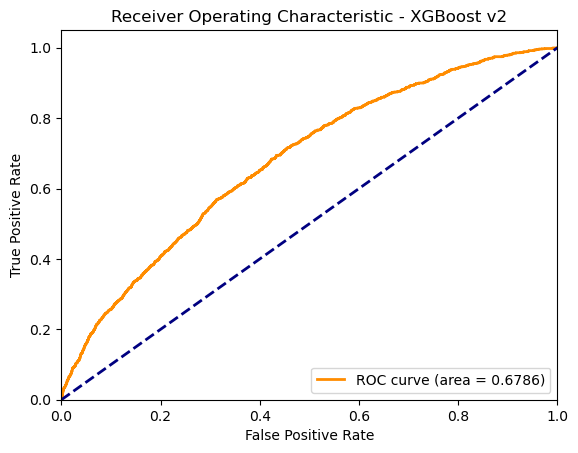

In [163]:


# Predikcija verovatnoća na validacionom skupu
y_valid_pred_proba_xgb = final_xgb_model.predict_proba(X_valid_selected)[:, 1]

# Izračunavanje ROC krive
fpr, tpr, thresholds = roc_curve(valid_y, y_valid_pred_proba_xgb)
roc_auc = auc(fpr, tpr)

# Nacrtaj ROC krivu
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost v2')
plt.legend(loc="lower right")
plt.show()


In [164]:
# Izračunavanje Youdenovog indeksa
youden_index = tpr - fpr
best_threshold_index = youden_index.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold according to Youden's index: {best_threshold:.4f}")


Best Threshold according to Youden's index: 0.4674


In [165]:
# Matrica konfuzije za podrazumevani threshold (0.5)
conf_matrix_default = confusion_matrix(valid_y, y_valid_pred_xgb)
print("Confusion Matrix with Default Threshold (0.5):")
print(conf_matrix_default)


Confusion Matrix with Default Threshold (0.5):
[[6403 3208]
 [ 555  781]]


In [166]:


# Predikcija sa optimalnim threshold-om
y_valid_pred_optimal_xgb = (y_valid_pred_proba_xgb >= best_threshold).astype(int)

# Matrica konfuzije za optimalni threshold
conf_matrix_optimal = confusion_matrix(valid_y, y_valid_pred_optimal_xgb)
print("Confusion Matrix with Optimal Threshold:")
print(conf_matrix_optimal)


Confusion Matrix with Optimal Threshold:
[[5237 4374]
 [ 380  956]]


In [168]:
optimal_threshold, optimal_income, economic_incomes, thresholds = find_optimal_threshold(valid_y, y_valid_pred_proba_xgb)

# Prikaz rezultata
print(f"Optimal Threshold according to economic income: {optimal_threshold:.4f}")
print(f"Economic Income at optimal threshold {optimal_threshold:.4f}: {optimal_income}")

# Izračunavanje ekonomske dobiti za podrazumevani threshold od 0.5
economic_income_default_threshold = calculate_economic_income(valid_y, y_valid_pred_proba_xgb, 0.5)
print(f"Economic Income at default threshold 0.5: {economic_income_default_threshold}")

Optimal Threshold according to economic income: 0.6832
Economic Income at optimal threshold 0.6832: 21399000
Economic Income at default threshold 0.5: 6408000


In [170]:
## Veci prihod je kod xgboosta, taj testiramo

In [184]:
X_train_final = np.vstack((X_train_selected, X_valid_selected))
y_train_final = np.hstack((train_y, valid_y))

# Kreiranje finalnog XGBoost modela
final_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.1,
    learning_rate=0.01,
    max_depth=7,
    min_child_weight=5,
    scale_pos_weight=7,
    subsample=0.7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Treniranje modela na finalnom train setu
final_xgb_model.fit(X_train_final, y_train_final)

# Testiranje modela na test setu
y_test_pred = final_xgb_model.predict(X_test_selected)
y_test_pred_proba = final_xgb_model.predict_proba(X_test_selected)[:, 1]

C:\Users\Milutin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [185]:
accuracy_test = accuracy_score(test_y, y_test_pred)
precision_test = precision_score(test_y, y_test_pred)
recall_test = recall_score(test_y, y_test_pred)
roc_auc_test = roc_auc_score(test_y, y_test_pred_proba)
f1_test = f1_score(test_y, y_test_pred)

# Prikaz rezultata
print(f"XGBoost Accuracy on test set: {accuracy_test:.4f}")
print(f"XGBoost Precision on test set: {precision_test:.4f}")
print(f"XGBoost Recall on test set: {recall_test:.4f}")
print(f"XGBoost AUC on test set: {roc_auc_test:.4f}")
print(f"XGBoost F1-Score on test set: {f1_test:.4f}")


XGBoost Accuracy on test set: 0.6588
XGBoost Precision on test set: 0.2027
XGBoost Recall on test set: 0.6043
XGBoost AUC on test set: 0.6844
XGBoost F1-Score on test set: 0.3036


In [173]:
fpr, tpr, thresholds = roc_curve(test_y, y_test_pred_proba)
youden_index = tpr - fpr
best_threshold_index = youden_index.argmax()
best_threshold = thresholds[best_threshold_index]

# Izračunavanje ekonomske dobiti za optimalni threshold
economic_income_best_threshold = calculate_economic_income(test_y, y_test_pred_proba, best_threshold)

# Izračunavanje ekonomske dobiti za podrazumevani threshold od 0.5
economic_income_default_threshold = calculate_economic_income(test_y, y_test_pred_proba, 0.5)

# Prikaz rezultata ekonomske dobiti
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Economic Income at Optimal Threshold: {economic_income_best_threshold}")
print(f"Economic Income at Default Threshold (0.5): {economic_income_default_threshold}")

Optimal Threshold: 0.4962
Economic Income at Optimal Threshold: 5892000
Economic Income at Default Threshold (0.5): 6552800


In [174]:
optimal_threshold, optimal_income, economic_incomes, thresholds = find_optimal_threshold(test_y, y_test_pred_proba)

# Prikaz rezultata
print(f"Optimal Threshold according to economic income: {optimal_threshold:.4f}")
print(f"Economic Income at optimal threshold {optimal_threshold:.4f}: {optimal_income}")

Optimal Threshold according to economic income: 0.7015
Economic Income at optimal threshold 0.7015: 21327900


In [178]:
def calculate_economic_income(y_true, y_pred_proba, threshold):
    # Primenjujemo threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Definišemo TP, TN, FP, FN
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    # Izračunavanje ekonomskog prihoda prema matrici
    economic_income = (TN * 3100) + (FP * -3100) + (FN * -6300)
    
    return economic_income

# Funkcija za pronalaženje optimalnog threshold-a
def find_optimal_threshold(y_true, y_pred_proba):
    # Izračunavanje ROC krive
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    
    # Računamo ekonomski prihod za svaki threshold
    economic_incomes = [calculate_economic_income(y_true, y_pred_proba, t) for t in thresholds]
    
    # Nalazimo threshold koji maksimizuje ekonomski prihod
    best_index = np.argmax(economic_incomes)
    best_threshold = thresholds[best_index]
    best_income = economic_incomes[best_index]
    
    return best_threshold, best_income

# Izračunavanje ekonomske dobiti za Random Forest model
optimal_threshold_rf, optimal_income_rf = find_optimal_threshold(valid_y, y_valid_pred_proba_rf2)
economic_income_rf = calculate_economic_income(valid_y, y_valid_pred_proba_rf2, optimal_threshold_rf)

# Izračunavanje ekonomske dobiti za XGBoost model
optimal_threshold_xgb, optimal_income_xgb = find_optimal_threshold(valid_y, y_valid_pred_proba_xgb)
economic_income_xgb = calculate_economic_income(valid_y, y_valid_pred_proba_xgb, optimal_threshold_xgb)

# Benchmark model koji sve kupuje
def calculate_benchmark_income(y_true):
    # U benchmark modelu sve kupovine su realizovane (svi su TN ili FN)
    FN = np.sum(y_true == 1)  # Svi stvarni pozitivni su FN
    TN = np.sum(y_true == 0)  # Svi stvarni negativni su TN
    
    # Računanje ekonomske dobiti za benchmark model
    economic_income = (TN * 3100) + (FN * -6300)
    return economic_income

# Ekonomska dobit za benchmark model
economic_income_benchmark = calculate_benchmark_income(valid_y)

# Prikaz rezultata
print(f"Random Forest Optimal Threshold: {optimal_threshold_rf:.4f}")
print(f"Random Forest Economic Income: {economic_income_rf}")

print(f"XGBoost Optimal Threshold: {optimal_threshold_xgb:.4f}")
print(f"XGBoost Economic Income: {economic_income_xgb}")

print(f"Benchmark Economic Income (All Purchased): {economic_income_benchmark}")

Random Forest Optimal Threshold: 0.8455
Random Forest Economic Income: 21390300
XGBoost Optimal Threshold: 0.6832
XGBoost Economic Income: 21399000
Benchmark Economic Income (All Purchased): 21377300


In [186]:
optimal_threshold_test, optimal_income_test = find_optimal_threshold(test_y, y_test_pred_proba)
economic_income_test = calculate_economic_income(test_y, y_test_pred_proba, optimal_threshold_test)

# Prikaz rezultata
print(f"Optimal Threshold on Test Set: {optimal_threshold_test:.4f}")
print(f"Economic Income on Test Set at Optimal Threshold: {economic_income_test}")

Optimal Threshold on Test Set: 0.7015
Economic Income on Test Set at Optimal Threshold: 21327900


In [198]:
economic_income_benchmark = calculate_benchmark_income(test_y)
print(f"Benchmark Economic Income (All Purchased): {economic_income_benchmark}")

Benchmark Economic Income (All Purchased): 21277000


In [199]:
21327900-21277000

50900

In [190]:
calculate_benchmark_income(y_train_final)

120595900